In [1]:
import numpy as np
import pandas as pd

In [41]:
df=pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [283]:
df.sample(10)


,target,text,num_characters,num_words,num_sentences,transformed_text
3779,0,Then ur physics get a-?,23,6,1,ur physic get
749,0,By monday next week. Give me the full gist,42,10,2,monday next week give full gist
2046,0,"Aight fuck it, I'll get it later",32,9,1,aight fuck get later
415,0,Whatsup there. Dont u want to sleep,35,8,2,whatsup dont u want sleep
2556,0,Fuck babe ... What happened to you ? How come ...,66,15,2,fuck babe happen come never came back
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5534,0,Ok which your another number,28,5,1,ok anoth number
1144,0,Really... I tot ur paper ended long ago... But...,115,31,5,realli tot ur paper end long ago wat u copi ju...
1622,1,U have a secret admirer who is looking 2 make ...,132,26,1,u secret admir look 2 make contact r reveal th...
5300,0,I can't make it tonight,23,6,1,ca make tonight


In [14]:
df.shape

(5572, 5)

In [15]:
#data cleaning, eda, text preprocessing,model building, evaluation, improvement, website, deploy


1.Data Cleaning

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [42]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)


In [43]:
df.sample(5)

,v1,v2
3204,ham,"Oh, yes, I've just been a little under the wea..."
2574,spam,Your next amazing xxx PICSFREE1 video will be ...
3265,ham,tap & spile at seven. * Is that pub on gas st ...
1922,ham,I'll be in sch fr 4-6... I dun haf da book in ...
2429,spam,Guess who am I?This is the first time I create...


In [55]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2707,spam,Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
3407,spam,Do you want a New Nokia 3510i colour phone Del...
183,ham,"He will, you guys close?"
5536,ham,Aiyah ok wat as long as got improve can alread...
1765,ham,Hi this is yijue... It's regarding the 3230 te...


In [56]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [57]:
df['target'] = encoder.fit_transform(df['target'])

In [58]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
#missing values
df.isnull().sum()

target              0
text                0
num_characters      0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

In [60]:
#duplicated values
df.duplicated().sum()

403

In [61]:
#remove duplicates
df= df.drop_duplicates(keep='first')

In [62]:
df.duplicated().sum()

0

In [63]:
df.shape


(5169, 2)

2.EDA

In [64]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

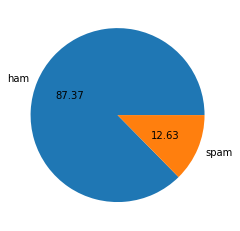

In [71]:
#for piechart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [73]:
#data is imbalanced 
#count no of letters,words and sentences
!pip install nltk

In [100]:
import nltk


In [75]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91799\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [77]:
#calculating no of characters
df['num_characters']=df['text'].apply(len)

In [78]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [82]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [83]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [85]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [86]:
#ham description
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [87]:
#spam description
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [88]:
#after comparing results we got to know spam sms are bigger in length
# we will draw histogram to see the difference btw characters
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

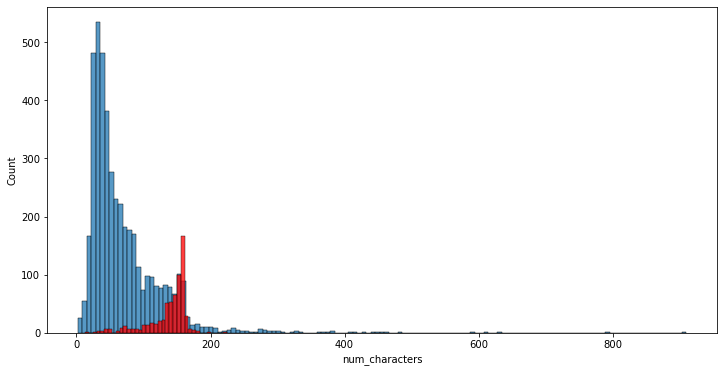

In [284]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

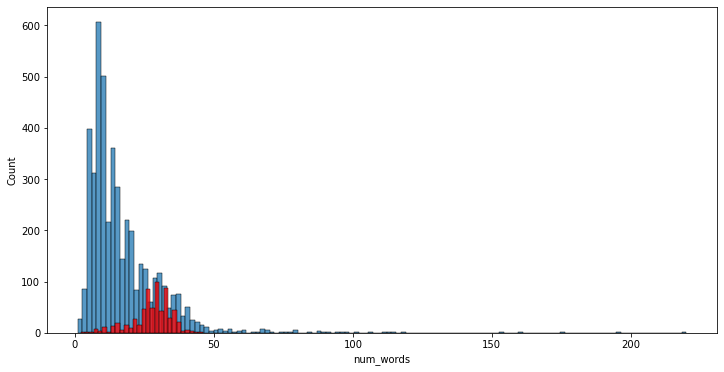

In [285]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

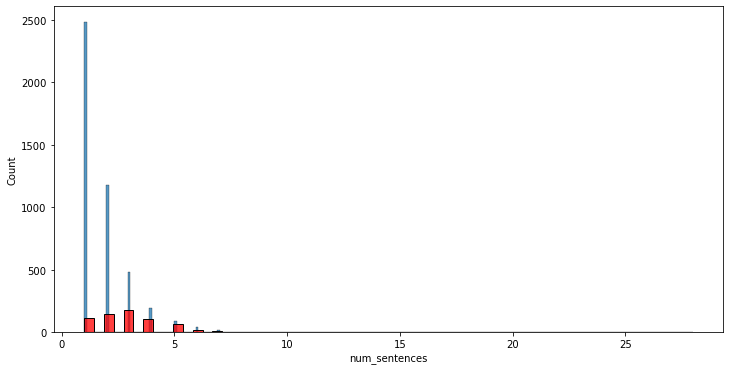

In [94]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

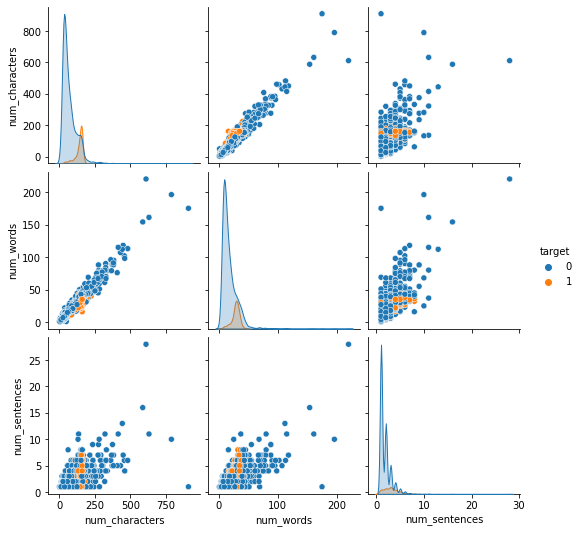

In [95]:
#relation btw words with characters or words with sent
sns.pairplot(df,hue='target')

<AxesSubplot:>

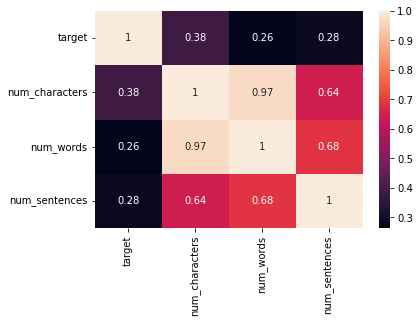

In [96]:
# we check correlation btw attributes
sns.heatmap(df.corr(),annot=True)


In [262]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [97]:
#we will keep num_chars as it has max correlation with target 0.38


3.Data Preprocessing
    Lower case,tokenization,removing special chars,removing stop words(is,of,the) and punctuation, stemming(dance, dancer,dancing =dance)

In [119]:

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91799\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [263]:
def transform_text(text):
    text=text.lower()
    #tokenization() break into words
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [264]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [265]:

print(df['text'][2000])
transform_text(df['text'][2000])


But i'll b going 2 sch on mon. My sis need 2 take smth.


'b go 2 sch mon si need 2 take smth'

In [266]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [267]:
df['transformed_text']=df['text'].apply(transform_text)


In [268]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [269]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')


In [270]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [271]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

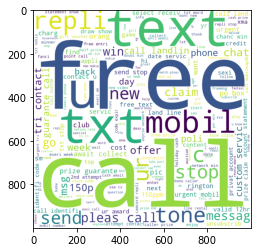

In [272]:
plt.imshow(spam_wc)

In [279]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [273]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

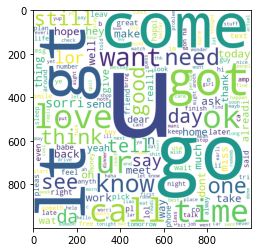

In [278]:
plt.imshow(ham_wc)

In [280]:
#now we will take top 30 words used in spam nd ham msg

spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for j in msg.split():
        spam_corpus.append(j)


In [281]:
len(spam_corpus)

9939

C:\Users\91799\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


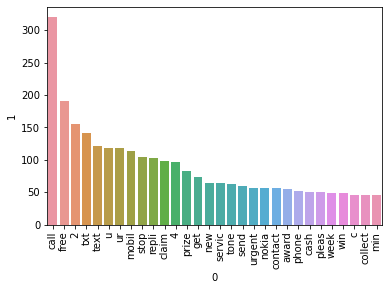

In [204]:
#now we make dictionary of above list so that we have each word frequency
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [282]:

ham_corpus=[]
for i in df[df['target'] == 0]['transformed_text'].tolist():
    for j in i.split():
        ham_corpus.append(j)
len(ham_corpus)

35394

C:\Users\91799\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


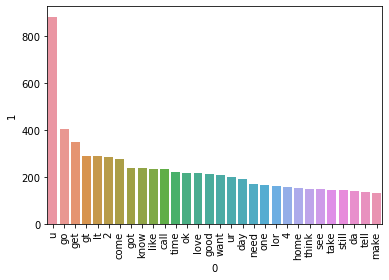

In [205]:

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4.Modelling

In [406]:
#now we have target in 0,1 form but tranformed_text is in text for we have to convert it into vectors
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfdif= TfidfVectorizer(max_features=3000)
X = tfdif.fit_transform(df['transformed_text']).toarray()


In [405]:
#appending the num_char col to X
#X= np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [407]:

X.shape

(5169, 3000)

In [352]:
#trying scaling on X
#Not giving good results
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [408]:
y=df['target'].values

In [409]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [410]:
from sklearn.model_selection import train_test_split

In [411]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [412]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [413]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [381]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [414]:
#precisionscore is best in this multinominalNB using tfdif
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [415]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [384]:
#importing all other algorithms to check whether they give better precision and accuracy than multinomial naive bayes algo

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [304]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [385]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc= AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)

In [386]:
#making dictionary to map keys(algo name) with algo objects as value
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [387]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision


In [388]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\91799\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [389]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("for",name)
    print("Accuracy:",current_accuracy)
    print("Precision:",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

C:\Users\91799\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for SVC
Accuracy: 0.8665377176015474
Precision: 0.0
for KN
Accuracy: 0.9274661508704062
Precision: 0.7739130434782608
for NB
Accuracy: 0.9410058027079303
Precision: 1.0
for DT
Accuracy: 0.9448742746615088
Precision: 0.8857142857142857
for LR
Accuracy: 0.9613152804642167
Precision: 0.9622641509433962
for RF
Accuracy: 0.9680851063829787
Precision: 0.981651376146789
for AdaBoost
Accuracy: 0.9642166344294004
Precision: 0.9316239316239316
for BgC
Accuracy: 0.9661508704061895
Precision: 0.8992248062015504
for ETC
Accuracy: 0.9806576402321083
Precision: 0.9758064516129032
for GBDT
Accuracy: 0.9516441005802708
Precision: 0.9313725490196079
for xgb
Accuracy: 0.9709864603481625
Precision: 0.9426229508196722


In [324]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [325]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [326]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [327]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.969052
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


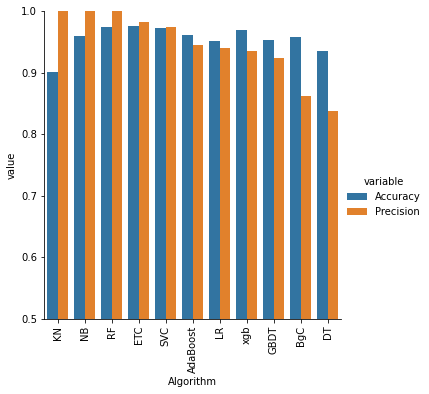

In [328]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model improvement
# 1. change the max_feature parameter of tfdif
# 2. scaling X value transformed text

In [348]:
#model improve
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [370]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [369]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [394]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [392]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [395]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_num_chars_x,Precision_num_chars_x,Accuracy_num_chars_y,Precision_num_chars_y
0,KN,0.900387,1.000000,0.905222,1.000000,0.927466,0.773913,0.927466,0.773913
1,NB,0.959381,1.000000,0.970986,1.000000,0.941006,1.000000,0.941006,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759,0.968085,0.981651,0.968085,0.981651
3,ETC,0.975822,0.982906,0.974855,0.974576,0.980658,0.975806,0.980658,0.975806
4,SVC,0.972921,0.974138,0.975822,0.974790,0.866538,0.000000,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.964217,0.931624,0.964217,0.931624
6,LR,0.951644,0.940000,0.958414,0.970297,0.961315,0.962264,0.961315,0.962264
7,xgb,0.969052,0.934426,0.971954,0.943089,0.970986,0.942623,0.970986,0.942623
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.951644,0.931373,0.951644,0.931373
9,BgC,0.958414,0.862595,0.957447,0.867188,0.966151,0.899225,0.966151,0.899225


In [396]:
#from above we got mnb with 3000 gives the best result
#now we are are combining best 3 algo 
#main goal is to maintain precision 1 and accuracy should be increased by 0.97 
#voting classifier
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [397]:
voting=VotingClassifier(estimators=[('rf',rfc),('nb',mnb),('et',etc)],voting='soft')

In [398]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [399]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.971953578336557
Precision 1.0


In [400]:
#applying stacking its same as voting but with different ratios
estimators=[('rf',rfc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [401]:
from sklearn.ensemble import StackingClassifier

In [402]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [403]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9


In [417]:
import pickle
pickle.dump(tfdif,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))